In [1]:
from keras.models import load_model
import numpy as np
import cv2
from keras.preprocessing.image import img_to_array
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = load_model('saved_model.h5')
print("Model loaded from disk.")

Model loaded from disk.


In [3]:
default_image_size = tuple((256, 256))

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, default_image_size)
            return img_to_array(image) / 255.0
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
label_binarizer = pickle.load(open('labels.pkl', 'rb'))

In [6]:
def predict_image(image_path):
    image_array = convert_image_to_array(image_path)
    if image_array.size == 0:
        print("Invalid image.")
        return

    image_array = np.expand_dims(image_array, axis=0)

    prediction = model.predict(image_array)
    predicted_label = label_binarizer.classes_[np.argmax(prediction)]
    print(f"Predicted label: {predicted_label}")

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(image)
    plt.title(f"Predicted label: {predicted_label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted label: Grape Black Measles


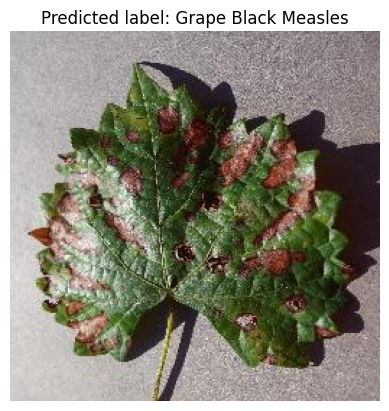

In [10]:
image_path = 'mpt2/PlantVillage/Grape Black Measles/GrapeBlackMeasles(13).jpg'
predict_image(image_path)

In [13]:
image_path1 = 'labels.pkl'
predict_image(image_path1)

Invalid image.
